In [10]:
import numpy as np
import itertools
import pygsti
import pickle
from matplotlib import pyplot as plt
from matplotlib import colormaps as cmaps
#probably want some plotting stuff

In [11]:
#I either end up with massive error bars or tiny error bars...
#would be worth doing the exhaustive method on a small number of qubits.

In [12]:
pauli_sampling = 'all-paulis'
spam = 'perfect-spam'
#rs = [0.001, 0.01, 0.05, 0.1]
idxs = list(range(1,60))
num_unmeas = [1,2,4,6,8]
num_meas = [1,2]

In [13]:
def resample(evals, k, num_repeats):
    return np.std(list(np.mean(np.random.choice(evals, k, replace=True)) for _ in range(num_repeats)))

4 1
6 1
8 1
4 2
6 2
8 2


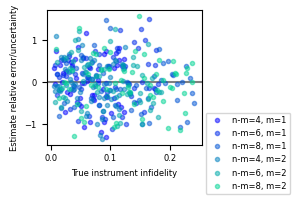

In [25]:
plt.figure(figsize=(2,1.75))
colors = [cmaps['winter'](j/6) for j in range(6)]
num_unmeas = [4,6,8]
num_meas = [1,2]
i = 0
for nmeas in num_meas:
    for nrest in num_unmeas:
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            if nrest <= 2:
                fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_full_estimate.pkl'
            else:
                fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt_depol.pkl'
            with open(fname, 'rb') as f:
                result_dict = pickle.load(f)
            f = result_dict['fidelity']
            fs_true.append(f)
            fs_est.append(result_dict['fidelity_est'])
            fs_std.append(np.sqrt(result_dict['fidelity_std']**2 + resample(list(result_dict['evals_by_p'].values()), 50, 100)**2))


        plt.errorbar(1-np.array(fs_true), (np.array(fs_est)-np.array(fs_true))/fs_std, marker='.', linewidth=0, elinewidth=1, color=colors[i], label=f'n-m={nrest}, m={nmeas}', alpha=0.5)
        
        i+=1
        
plt.axhline(0, color='gray')
#plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
plt.legend(bbox_to_anchor=(1,0.27), fontsize=6)
plt.ylabel('Estimate relative error/uncertainty', fontsize=6)
plt.xlabel('True instrument infidelity', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.savefig(f'plots/rel_error_more_q_depol.pdf')
#plt.ylim(-1.5,1.5)
plt.show()

4 1
6 1
8 1


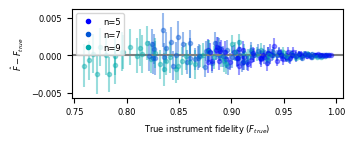

In [26]:
plt.figure(figsize=(3.5,1.15))
colors = [cmaps['winter'](j/3) for j in range(3)]
num_unmeas = [4,6,8]
num_meas = [1]
i = 0
classes = [f'n={nrest+1}' for nrest in num_unmeas]
data = []
for nmeas in num_meas:
    for nrest in num_unmeas:
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            try:
                if nrest <= 2:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt_biased.pkl'
                else:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt_depol.pkl'
                with open(fname, 'rb') as f:
                    result_dict = pickle.load(f)
                f = result_dict['fidelity']
                fs_true.append(f)
                fs_est.append(result_dict['fidelity_est']) 
                fstd = np.sqrt(result_dict['fidelity_std']**2 + resample(list(result_dict['evals_by_p'].values()), 50, 100)**2)
                fs_std.append(fstd)
                data.append((result_dict['fidelity'], result_dict['fidelity_est']-result_dict['fidelity'], fstd,i))
            except:
                pass
            
        #pts = zip(fs_true, )
    

        #plt.errorbar(np.array(fs_true), (np.array(fs_est)-np.array(fs_true)), yerr=fs_std, marker='.', linewidth=0, elinewidth=1, color=colors[i], label=f'n-m={nrest}, m={nmeas}', alpha=0.5)
        
        i+=1

plot_idxs = np.random.permutation(len(data))
for plot_idx in plot_idxs:
    plt.errorbar(data[plot_idx][0], 
               data[plot_idx][1], 
               yerr=data[plot_idx][2],
               c=colors[data[plot_idx][3]],
               alpha=0.4,
                marker='.')
        
plt.axhline(0, color='gray')
#line_pts = np.linspace(0.9,1,100)
#plt.plot(line_pts, line_pts, color = 'gray')
#plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
h = lambda c: plt.Line2D([],[],color=c, ls="",marker=".")
plt.legend(handles=[h(colors[i]) for i in range(3)],
           labels=classes, fontsize=6)
#plt.legend(bbox_to_anchor=(1,0.27), fontsize=6)
plt.ylabel(r'''$\hat{F}-F_{true}$''', fontsize=6)
plt.xlabel(r'''True instrument fidelity ($F_{true}$)''', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.savefig(f'plots/abs_error_less_q_depol.pdf')
#plt.ylim(-1.5,1.5)
plt.show()

4 2
6 2
8 2


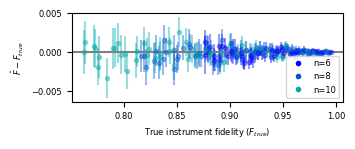

In [27]:
plt.figure(figsize=(3.5,1.15))
colors = [cmaps['winter'](j/3) for j in range(3)]
num_unmeas = [4,6,8]
num_meas = [2]
i = 0
classes = [f'n={nrest+2}' for nrest in num_unmeas]
data = []
for nmeas in num_meas:
    for nrest in num_unmeas:
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            try:
                if nrest <= 2:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt_biased.pkl'
                else:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt_depol.pkl'
                with open(fname, 'rb') as f:
                    result_dict = pickle.load(f)
                f = result_dict['fidelity']
                fs_true.append(f)
                fs_est.append(result_dict['fidelity_est']) 
                fstd = np.sqrt(result_dict['fidelity_std']**2 + resample(list(result_dict['evals_by_p'].values()), 50, 100)**2)
                fs_std.append(fstd)
                data.append((result_dict['fidelity'], result_dict['fidelity_est']-result_dict['fidelity'], fstd,i))
            except:
                pass
            
        #pts = zip(fs_true, )
    

        #plt.errorbar(np.array(fs_true), (np.array(fs_est)-np.array(fs_true)), yerr=fs_std, marker='.', linewidth=0, elinewidth=1, color=colors[i], label=f'n-m={nrest}, m={nmeas}', alpha=0.5)
        
        i+=1

plot_idxs = np.random.permutation(len(data))
for plot_idx in plot_idxs:
    plt.errorbar(data[plot_idx][0], 
               data[plot_idx][1], 
               yerr=data[plot_idx][2],
               c=colors[data[plot_idx][3]],
               alpha=0.4,
                marker='.')
        
plt.axhline(0, color='gray')
#line_pts = np.linspace(0.9,1,100)
#plt.plot(line_pts, line_pts, color = 'gray')
#plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
h = lambda c: plt.Line2D([],[],color=c, ls="",marker=".")
plt.legend(handles=[h(colors[i]) for i in range(3)],
           labels=classes, fontsize=6)
#plt.legend(bbox_to_anchor=(1,0.27), fontsize=6)
plt.ylabel(r'''$\hat{F}-F_{true}$''', fontsize=6)
plt.xlabel(r'''True instrument fidelity ($F_{true}$)''', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.savefig(f'plots/abs_error_more_q_depol.pdf')
#plt.ylim(-1.5,1.5)
plt.show()

In [20]:
data

[(0.9923662858051239, -2.9111951198035335e-05, 0.00015190795593685824, 0),
 (0.9889867037160452, -7.832696936560524e-05, 0.00021134160006318887, 0),
 (0.9857913202496272, 0.00027622726324705305, 0.00022173456657576484, 0),
 (0.9825395147874186, 1.799758254195094e-05, 0.0002728257077870945, 0),
 (0.9788039176999213, -0.000144512153559484, 0.00032027493244233754, 0),
 (0.976396601030031, -7.994597271510084e-05, 0.00031907801487709504, 0),
 (0.9728520788351076, 0.00021338607318777125, 0.000359282116446184, 0),
 (0.9686934220157775, 0.00028856828032319815, 0.00045610040517218083, 0),
 (0.9660939808318773, 0.0003350679099537457, 0.000490766799818934, 0),
 (0.9627075960084015, 0.00018629864333319368, 0.0004839560431183266, 0),
 (0.9597527078067675, -6.131307195067492e-05, 0.0005516723183140221, 0),
 (0.9573951563474163, -0.00033493392753491946, 0.0005713312576877708, 0),
 (0.9526367183738509, 0.0005017607800458235, 0.000610672885792284, 0),
 (0.9492330384360723, -6.842942517792938e-05, 0.000

4 1


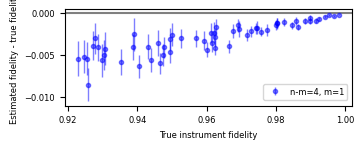

4 2


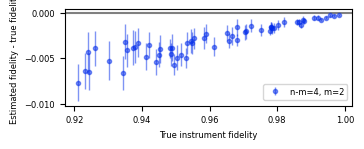

6 1


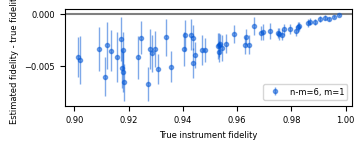

6 2


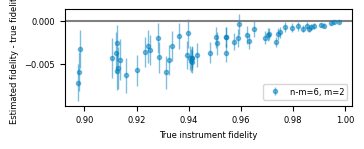

8 1


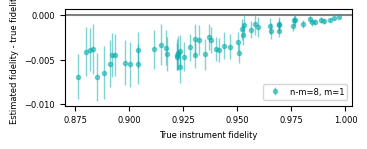

8 2


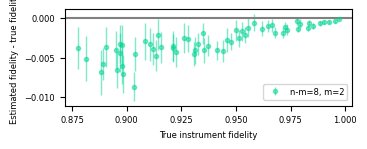

In [59]:
colors = [cmaps['winter'](j/6) for j in range(6)]
num_unmeas = [4,6,8]
num_meas = [1,2]
i = 0
for nrest in num_unmeas:
    
    for nmeas in num_meas:
        plt.figure(figsize=(3.7,1.25))
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            try:
                if nrest <= 2:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_full_estimate.pkl'
                else:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt_depol.pkl'
                with open(fname, 'rb') as f:
                    result_dict = pickle.load(f)
                f = result_dict['fidelity']
                fs_true.append(f)
                fs_est.append(result_dict['fidelity_est'])
                fs_std.append(np.sqrt(result_dict['fidelity_std']**2 + resample(list(result_dict['evals_by_p'].values()), 50, 100)**2))

            except:
                pass

        plt.errorbar(np.array(fs_true), (np.array(fs_est)-np.array(fs_true)), yerr=fs_std, marker='.', linewidth=0, elinewidth=1, color=colors[i], label=f'n-m={nrest}, m={nmeas}', alpha=0.5)
        
        i+=1
    
        plt.axhline(0, color='gray')
        #line_pts = np.linspace(0.9,1,100)
        #plt.plot(line_pts, line_pts, color = 'gray')
        #plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
        plt.legend(bbox_to_anchor=(1,0.27), fontsize=6)
        plt.ylabel('Estimated fidelity - true fidelity', fontsize=6)
        plt.xlabel('True instrument fidelity', fontsize=6)
        #plt.xlim(0.8,1)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        plt.savefig(f'plots/abs_error_{nrest}_{nmeas}_depol.pdf')
        #plt.ylim(-1.5,1.5)
        plt.show()

In [9]:
fs_std

[0.0001362501429844032,
 0.00017589303227870937,
 0.000213823549640906,
 0.0002448434201504645,
 0.00028293192201471283,
 0.0003498447900477276,
 0.0003758949901315488,
 0.00038811807002867406,
 0.0004466273424796439,
 0.00045905460493118113,
 0.00047490241062781455,
 0.0005806181453823025,
 0.0006272504257734071,
 0.0005863003880056387,
 0.0006854318916284217,
 0.0007125581577512883,
 0.0007313482489322237,
 0.0007886674176151523,
 0.0008219415642202802,
 0.0009014902350299283,
 0.0009509282469957147,
 0.0010011017866349912,
 0.0009655677550471111,
 0.0011188907167365126,
 0.0010745941682491391,
 0.0009999600942219551,
 0.001276576897747434,
 0.0011732813449720316,
 0.0012329692828556738,
 0.0013148378056391258,
 0.0014023296041536775,
 0.0013366139275325225,
 0.0013687935976279054,
 0.0012906597004306297,
 0.0014436164322807717,
 0.001531451601753327,
 0.001538176030420952,
 0.0013874489642938994,
 0.0017036988870837034,
 0.0016462573108451941,
 0.0016857775185583168,
 0.001814337564

4 1


ValueError: zero-size array to reduction operation minimum which has no identity

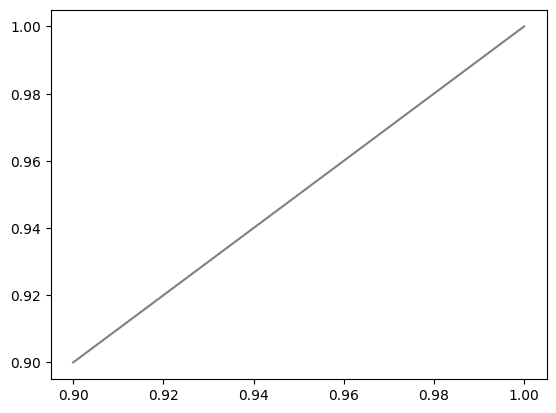

In [10]:
#result_dict = {'T':T, 'probs':probs, 'inst':usc, 'fidelity':fidelity, 'fidelity_est':fidelity_est, 
#               'fidelity_std':fidelity_std, 'evals_by_p':evals_by_p, 'tvals_by_p':tvals_by_p, 'r':r,'noise_strength_mcms':noise_strength_mcms}

for nmeas in num_meas:
    for nrest in num_unmeas:
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            try:
                if nrest <= 2:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_full_estimate.pkl'
                else:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt_biased.pkl'
                with open(fname, 'rb') as f:
                    result_dict = pickle.load(f)
                f = result_dict['fidelity']
                fs_true.append(f)
                fs_est.append(result_dict['fidelity_est'])
                fs_std.append(result_dict['fidelity_std'])
                #print(idx, (result_dict['fidelity_est']-(f*(1-0.5*(1-f))**2))/result_dict['fidelity_std'], result_dict['fidelity_std'])
            except:
                pass
            #fidelity_points.append((fidelity, fidelity_est, fidelity_std))
        #print(fs_std)

        plt.errorbar(fs_true, fs_est, yerr=fs_std, marker='.', linewidth=0, elinewidth=1)

        line_pts = np.linspace(0.9,1,100)
        plt.plot(line_pts, line_pts, color = 'gray')
        plt.xlim(np.min(fs_true),0.995)
        plt.ylim(np.min(fs_true),0.995)
        plt.ylabel('Estimated instrument fidelity')
        plt.xlabel('True instrument fidelity')
        plt.savefig(f'plots/true_vs_est_{nmeas}_{nrest}_q_alt.png')
        plt.show()

        plt.errorbar(1-np.array(fs_true), (np.array(fs_est)-np.array(fs_true))/fs_std, marker='.', linewidth=0, elinewidth=1)
        plt.axhline(0, color='gray')
        plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
        plt.ylabel('Estimate relative error/uncertainty')
        plt.xlabel('True instrument infidelity')
        plt.savefig(f'plots/rel_error_{nmeas}_{nrest}_q_alt_biased.png')
        #plt.ylim(-1.5,1.5)
        plt.show()

In [ ]:
#why are there so many points significantly above 0? In these simulations, we're sampling all of the Paulis.

In [77]:
pauli_sampling = 'all-paulis'
spam = 'imperfect-spam'
spam_ps = [0, 0.005, 0.01, 0.02]
idxs = list(range(0,0))
num_unmeas = 1
num_meas = 1

In [84]:
cdict = {0: 'blue', 0.005:'green', 0.01:'yellow', 0.02:'orange'}

In [43]:
# #result_dict = {'T':T, 'probs':probs, 'inst':usc, 'fidelity':fidelity, 'fidelity_est':fidelity_est, 
# #               'fidelity_std':fidelity_std, 'evals_by_p':evals_by_p, 'tvals_by_p':tvals_by_p, 'r':r,'noise_strength_mcms':noise_strength_mcms}

# for p1, p2 in itertools.product(spam_ps, repeat=2):
#     fs_est = []
#     fs_true = []
#     fs_std = []

#     for idx in idxs:
#         try:
#             with open(f'results/{pauli_sampling}-{spam}/prep_{p1}_meas_{p2}/{num_unmeas}_{num_meas}_qubit_mcmcb_run_{idx}', 'rb') as f:
#                 result_dict = pickle.load(f)

#             fs_true.append(result_dict['fidelity'])
#             fs_est.append(result_dict['fidelity_est'])
#             fs_std.append(result_dict['fidelity_std'])
#         except:
#             pass
#         #fidelity_points.append((fidelity, fidelity_est, fidelity_std))
        
#     plt.errorbar(fs_true, fs_est, yerr=fs_std, marker='.', linewidth=0, elinewidth=1, color=cdict[p1])
    
# #     line_pts = np.linspace(0.9,1,100)
# #     plt.plot(line_pts, line_pts, color = 'gray')
# #     plt.xlim(np.min(fs_true),np.max(fs_true))
# #     plt.ylim(np.min(fs_true),np.max(fs_true))
# #     plt.ylabel('Estimated instrument fidelity')
# #     plt.xlabel('True instrument fidelity')
# #     plt.savefig(f'plots/spam_{r}_true_vs_est_1_1_q.png')
# #     plt.show()
    
#     plt.errorbar(range(len(fs_est)), (np.array(fs_est)-np.array(fs_true))/fs_std, marker='.', linewidth=0, elinewidth=1)
    
#     #plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
#     plt.ylabel('Estimate relative error/uncertainty')
#     #plt.xlabel('True instrument infidelity')
# plt.axhline(0, color='gray')
# plt.savefig(f'plots/spam_{r}_rel_error_1_1_q.png')
# #plt.xlim(0.026,0.027)
# plt.show()


In [71]:
#should probably make histograms
with open(f'results/stim/1_1_qubit_mcmcb_run_66_full_estimate.pkl', 'rb') as f:
    result_dict = pickle.load(f)

In [72]:
result_dict['evals_by_p']

{('II', (False,)): 1.0,
 ('II', (True,)): 0.9667667989845584,
 ('IX', (False,)): 0.9211351239749612,
 ('IX', (True,)): 0.924708626383708,
 ('IY', (False,)): 0.9165292166067155,
 ('IY', (True,)): 0.9207064569989569,
 ('IZ', (False,)): 0.9056446423886639,
 ('IZ', (True,)): 0.9282647930557124,
 ('ZI', (False,)): 0.9349307801196671,
 ('ZI', (True,)): 0.9667060209523569,
 ('ZX', (False,)): 0.9289703536192766,
 ('ZX', (True,)): 0.9248611306314016,
 ('ZY', (False,)): 0.9252898664736796,
 ('ZY', (True,)): 0.9206877360459901,
 ('ZZ', (False,)): 0.951097669779818,
 ('ZZ', (True,)): 0.928185448343281}

In [73]:
np.mean(result_dict['stds'][1:])

0.0005568891099429307

In [74]:
np.std(list(result_dict['evals_by_p'].values()))

0.023362263172909018

In [75]:
result_dict['fidelity_std']

0.0005220835405714975

In [76]:
f = result_dict['fidelity']
f*(1-0.5*(1-f))**2

0.9351604463272499

In [77]:
est = result_dict['fidelity_est']
print(est)

0.9352802915224216


In [79]:
(est - f*(1-0.5*(1-f))**2)/result_dict['fidelity_std']

0.2295517591696746

In [19]:
result_dict.keys()

dict_keys(['probs_post', 'errors_post', 'probs_pre', 'errors_pre', 'probs_during', 'errors_during', 'fidelity', 'fidelity_est', 'fidelity_std', 'evals_by_p', 'energies', 'stds'])

In [20]:
len(result_dict['stds']) #4**1 but there are 2 qubits. The sampling is wrong for few qubits
#but I still don't see what's up with the error bars

4

In [ ]:
#try different types of models
#vary relative error of unmeas system and meas system
#vary how the error rates are randomly sampled